# Project:  Twitter Data Analysis 

# Objective: 
Gathering Data from three sources, and assess them assess them visually and programmatically for quality and tidiness issues. Detect and document at least eight (8) quality issues and two (2) tidiness issues in your wrangle_act.ipynb Jupyter Notebook

Clean each of the issues you documented while assessing. Perform this cleaning in **wrangle_act.ipynb** as well. The result should be a high quality and tidy master pandas DataFrame (or DataFrames, if appropriate)

Store the clean DataFrame(s) in a CSV file with the main one named **twitter_archive_master.csv** .

Analyze and visualize your wrangled data in your **wrangle_act.ipynb Jupyter Notebook**. 
At least **three (3) insights and one (1) visualization** must be produced.

Create a 300-600 word written report called **wrangle_report.pdf or wrangle_report.html** that briefly describes your wrangling efforts. This is to be framed as an internal document.

Create a 250-word-minimum written report called **act_report.pdf or act_report.html** that communicates the insights and displays the visualization(s) produced from your wrangled data. This is to be framed as an external document, like a blog post or magazine article, for example.

### Final deliverables:
#### 1. **wrangle_act.ipynb**,
#### 2. **twitter_archive_master.csv** 
#### 3. **wrangle_report.pdf**
#### 4. **wrangle_report.html**

## Importing Data and Packages 

In [83]:
#Importing packages required for analysis
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [84]:
# importing twitter-archive-enchanced data
twitter_df = pd.read_csv('twitter-archive-enhanced.csv')

In [85]:
# Display first 5 rows of data
twitter_df.head(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [86]:
# Download the image prediction file using the link provided to Udacity students
import requests
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
image_request = requests.get(url, allow_redirects=True)

open('image_predictions.tsv', 'wb').write(image_request.content)

335079

In [87]:
#Importing image_predictions.tsv file
image_df = pd.read_csv('image_predictions.tsv',sep ='\t')

In [88]:
# display first 5 rows of df
image_df.head(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [89]:
# importing the tweet_json.txt file
tweet_df = pd.read_json('tweet-json.txt',lines=True)

In [90]:
# Display first 5 records of json file
tweet_df.head(5)

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
0,2017-08-01 16:23:56+00:00,892420643555336193,892420643555336192,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,39467,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
1,2017-08-01 00:17:27+00:00,892177421306343426,892177421306343424,This is Tilly. She's just checking pup on you....,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,33819,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
2,2017-07-31 00:18:03+00:00,891815181378084864,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,False,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,25461,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
3,2017-07-30 15:58:51+00:00,891689557279858688,891689557279858688,This is Darla. She commenced a snooze mid meal...,False,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,42908,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
4,2017-07-29 16:00:24+00:00,891327558926688256,891327558926688256,This is Franklin. He would like you to stop ca...,False,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,41048,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN


# Assessing Data
In this section, we will assess the the dataframes created and find out the quality and tidyness involved in dataframes.

## Assesing Twitter archive dataframe

In [91]:
twitter_df.shape

(2356, 17)

In [92]:
twitter_df.sample(4)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1434,697270446429966336,NaN,NaN,2016-02-10 04:06:43 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bentley. He got stuck on his 3rd homew...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/697270446...,10,10,Bentley,None,None,None,None
98,873213775632977920,NaN,NaN,2017-06-09 16:22:42 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Sierra. She's one precious pupper. Abs...,NaN,NaN,NaN,https://www.gofundme.com/help-my-baby-sierra-g...,12,10,Sierra,None,None,pupper,None
1570,687732144991551489,NaN,NaN,2016-01-14 20:24:55 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",This is Ember. That's the q-tip she owes money...,NaN,NaN,NaN,https://vine.co/v/iOuMphL5DBY,11,10,Ember,None,None,None,None
1635,684222868335505415,NaN,NaN,2016-01-05 04:00:18 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Someone help the girl is being mugged. Several...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/684222868...,121,110,None,None,None,None,None


In [93]:
twitter_df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [94]:
twitter_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [95]:
twitter_df.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [96]:
#checking tweet id's uniqueness
twitter_df.tweet_id.nunique()

2356

In [97]:
#checking timestamp unique values
twitter_df.timestamp.nunique()

2356

In [98]:
#checking text unique values
twitter_df.text.nunique()

2356

In [99]:
# checking null values in in_reply_to_user_id column
sum(twitter_df.in_reply_to_user_id.isna())

2278

In [100]:
# checking null values in expanded_urls column
twitter_df[twitter_df.expanded_urls.isna()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
30,886267009285017600,8.862664e+17,2.281182e+09,2017-07-15 16:51:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@NonWhiteHat @MayhewMayhem omg hello tanner yo...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
55,881633300179243008,8.816070e+17,4.738443e+07,2017-07-02 21:58:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@roushfenway These are good dogs but 17/10 is ...,NaN,NaN,NaN,NaN,17,10,None,None,None,None,None
64,879674319642796034,8.795538e+17,3.105441e+09,2017-06-27 12:14:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@RealKentMurphy 14/10 confirmed,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
113,870726314365509632,8.707262e+17,1.648776e+07,2017-06-02 19:38:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@ComplicitOwl @ShopWeRateDogs &gt;10/10 is res...,NaN,NaN,NaN,NaN,10,10,None,None,None,None,None
148,863427515083354112,8.634256e+17,7.759620e+07,2017-05-13 16:15:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@Jack_Septic_Eye I'd need a few more pics to p...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
179,857214891891077121,8.571567e+17,1.806710e+08,2017-04-26 12:48:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@Marc_IRL pixelated af 12/10,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
185,856330835276025856,NaN,NaN,2017-04-24 02:15:55 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @Jenna_Marbles: @dog_rates Thanks for ratin...,8.563302e+17,66699013.0,2017-04-24 02:13:14 +0000,NaN,14,10,None,None,None,None,None
186,856288084350160898,8.562860e+17,2.792810e+08,2017-04-23 23:26:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@xianmcguire @Jenna_Marbles Kardashians wouldn...,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
188,855862651834028034,8.558616e+17,1.943518e+08,2017-04-22 19:15:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@dhmontgomery We also gave snoop dogg a 420/10...,NaN,NaN,NaN,NaN,420,10,None,None,None,None,None
189,855860136149123072,8.558585e+17,1.361572e+07,2017-04-22 19:05:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@s8n You tried very hard to portray this good ...,NaN,NaN,NaN,NaN,666,10,None,None,None,None,None


In [101]:
twitter_df.expanded_urls.isna().sum()

59

In [102]:
twitter_df['expanded_urls'].head()

0    https://twitter.com/dog_rates/status/892420643...
1    https://twitter.com/dog_rates/status/892177421...
2    https://twitter.com/dog_rates/status/891815181...
3    https://twitter.com/dog_rates/status/891689557...
4    https://twitter.com/dog_rates/status/891327558...
Name: expanded_urls, dtype: object

In [103]:
# checking null values in retweeted_status column
sum(twitter_df.retweeted_status_id.isna())

2175

In [104]:
twitter_df.rating_numerator.max()

1776

In [105]:
sum(twitter_df.rating_numerator > 15)

26

In [106]:
twitter_df.rating_denominator.min()

0

In [107]:
twitter_df[twitter_df.name.str.islower()]["name"]

22       such
56          a
118     quite
169     quite
193     quite
        ...  
2349       an
2350        a
2352        a
2353        a
2354        a
Name: name, Length: 109, dtype: object

In [108]:
#Checking for duplicates
twitter_df.duplicated().sum()

0

## Issues found in the twitter_df data frame

twitter_df contains 2356 rows and 17 columns. This dataset does not have any duplicate columns, some columns do not  have null values in them. Issues found in twitter_df:

1. columns in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp have null values, but these columns belongs to retweet and reply information which I do not need in Analysis.
2. Dropping the columns which has null values above.
3. rating_numerator has some high values so normalize the column for batter analysis.
4. Standardize rating_denominator to 10 as it contains 0 value which leads to infinity  values in ratings.
5. Change datatype of timeStamp to datetime.
6. cleaning dog name column - dog name has many non-dog names such as such', 'a','quite','quite','not','one','incredibly', etc and are in lower case
7. Source Type has weblink. I am going to extract source type from this column

## Assessing image_df dataframe

In [109]:
image_df.head(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [110]:
image_df.shape

(2075, 12)

In [111]:
image_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [112]:
image_df.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [113]:
image_df.duplicated().sum()

0

In [114]:
len(image_df.query('p1_dog == False or p2_dog == False or p3_dog == False'))

832

Image Data Frame has 2075 rows and 12 columns. This image data frame does not have any duplicate or null values in it.
1. In this Dataframe my goal is to delete rows where predections does not match with dog in all the three algorithims
2. Update p1, p2, p3 to title text and remove underscore in text

## Assessing Json file 

In [115]:
tweet_df.head(5)

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
0,2017-08-01 16:23:56+00:00,892420643555336193,892420643555336192,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,39467,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
1,2017-08-01 00:17:27+00:00,892177421306343426,892177421306343424,This is Tilly. She's just checking pup on you....,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,33819,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
2,2017-07-31 00:18:03+00:00,891815181378084864,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,False,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,25461,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
3,2017-07-30 15:58:51+00:00,891689557279858688,891689557279858688,This is Darla. She commenced a snooze mid meal...,False,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,42908,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
4,2017-07-29 16:00:24+00:00,891327558926688256,891327558926688256,This is Franklin. He would like you to stop ca...,False,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,41048,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN


In [116]:
tweet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 31 columns):
 #   Column                         Non-Null Count  Dtype              
---  ------                         --------------  -----              
 0   created_at                     2354 non-null   datetime64[ns, UTC]
 1   id                             2354 non-null   int64              
 2   id_str                         2354 non-null   int64              
 3   full_text                      2354 non-null   object             
 4   truncated                      2354 non-null   bool               
 5   display_text_range             2354 non-null   object             
 6   entities                       2354 non-null   object             
 7   extended_entities              2073 non-null   object             
 8   source                         2354 non-null   object             
 9   in_reply_to_status_id          78 non-null     float64            
 10  in_reply_to_status_id_st

### Removing unwanted columns in the tweet_df dataframe and keeping the columns 'id', 'retweet_count', 'favorite_count', 'user' . We will add remainig columns if neccessary in further analysis.

In [117]:
tweet_copy = tweet_df.copy()
tweet_clean = tweet_copy[['id','retweet_count','favorite_count']]
tweet_clean.head()

,id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


In [118]:
tweet_clean.shape

(2354, 3)

In [119]:
tweet_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   id              2354 non-null   int64
 1   retweet_count   2354 non-null   int64
 2   favorite_count  2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


In [120]:
sum(tweet_clean.retweet_count.duplicated())

630

In [121]:
sum(tweet_clean.favorite_count.duplicated())

347

In [122]:
tweet_clean.isna().sum()

id                0
retweet_count     0
favorite_count    0
dtype: int64

### Based on the overall Assessment on all three datasets , below are the final assessments made and further used for cleaning process

## Tidiness - Messy Data Untidy
1. doggo, floofer, pupper, puppo must make one column
2. Merge three dataframe together to make one dataFrame and extract it to .CSV file format

## Quality 

1. As we performed cleaning in tweet data by removing the columns not required for initial analysis. This step will be kept as iterative and include columns later.
2. in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp have null values, as these columns just have retweet and reply information which is not required in Analysis. so, deleting these columns with null values.
3. Data types of rating_numerator and denominator_rating are converted to float.
4. Converting twitter_df column timestamp to datetime datatype.
5. Changing the dataype of Id to string and rename to tweet_id
6. cleaning Dog name column as it contains non-dog names such as such', 'a','quite','quite','not','one','incredibly', etc and are in lower case.
7. Update p1, p2, p3 to title text and remove underscores from the texts.
8. delete rows where predections p1, p2 and p3 that doesn't match with dogs i.e false
9. In twitter_df, clean source link to extract source.


## Cleaning Process

### creating copy of three data frames before starting cleaning.

In [123]:
twitter_clean = twitter_df.copy()
image_clean  = image_df.copy()
tweet_copy  = tweet_df.copy()

### 1. Remove columns not required for analysis in tweet_df 

#### Code

In [124]:
tweet_clean = tweet_copy[['id','retweet_count','favorite_count']]

#### Test

In [125]:
tweet_clean.head()

,id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


### 2. Deleting the columns 'in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp'

#### Code

In [126]:
twitter_clean=twitter_clean.drop(['in_reply_to_status_id', 'in_reply_to_user_id',
                                    'retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp'],axis =1)

#### Test

In [127]:
twitter_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2356 non-null   int64 
 1   timestamp           2356 non-null   object
 2   source              2356 non-null   object
 3   text                2356 non-null   object
 4   expanded_urls       2297 non-null   object
 5   rating_numerator    2356 non-null   int64 
 6   rating_denominator  2356 non-null   int64 
 7   name                2356 non-null   object
 8   doggo               2356 non-null   object
 9   floofer             2356 non-null   object
 10  pupper              2356 non-null   object
 11  puppo               2356 non-null   object
dtypes: int64(3), object(9)
memory usage: 221.0+ KB


### 3. Converting rating_numerator and rating_denominator to float

#### Code

In [128]:
twitter_clean[['rating_numerator', 'rating_denominator']] = twitter_clean[['rating_numerator', 'rating_denominator']].astype('float')

#### Test

In [129]:
twitter_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            2356 non-null   int64  
 1   timestamp           2356 non-null   object 
 2   source              2356 non-null   object 
 3   text                2356 non-null   object 
 4   expanded_urls       2297 non-null   object 
 5   rating_numerator    2356 non-null   float64
 6   rating_denominator  2356 non-null   float64
 7   name                2356 non-null   object 
 8   doggo               2356 non-null   object 
 9   floofer             2356 non-null   object 
 10  pupper              2356 non-null   object 
 11  puppo               2356 non-null   object 
dtypes: float64(2), int64(1), object(9)
memory usage: 221.0+ KB


### 4. Converting timestamp datatype to timestamp

### Code

In [130]:
twitter_clean["timestamp"] = twitter_clean["timestamp"].astype('datetime64[ns]')

### Test

In [131]:
twitter_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   tweet_id            2356 non-null   int64         
 1   timestamp           2356 non-null   datetime64[ns]
 2   source              2356 non-null   object        
 3   text                2356 non-null   object        
 4   expanded_urls       2297 non-null   object        
 5   rating_numerator    2356 non-null   float64       
 6   rating_denominator  2356 non-null   float64       
 7   name                2356 non-null   object        
 8   doggo               2356 non-null   object        
 9   floofer             2356 non-null   object        
 10  pupper              2356 non-null   object        
 11  puppo               2356 non-null   object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(8)
memory usage: 221.0+ KB


### 5. changing tweet_id of twitter_df and image_df columns datatypes to str and rename id column of tweet_clean to tweet_id


In [132]:
tweet_clean.rename({'id': 'tweet_id'}, axis=1, inplace=True)

/Users/bhanuchanderkureti/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4133: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [133]:
tweet_clean.tweet_id.astype(str)

0       892420643555336193
1       892177421306343426
2       891815181378084864
3       891689557279858688
4       891327558926688256
               ...        
2349    666049248165822465
2350    666044226329800704
2351    666033412701032449
2352    666029285002620928
2353    666020888022790149
Name: tweet_id, Length: 2354, dtype: object

In [134]:
image_clean.tweet_id.astype(str)

0       666020888022790149
1       666029285002620928
2       666033412701032449
3       666044226329800704
4       666049248165822465
               ...        
2070    891327558926688256
2071    891689557279858688
2072    891815181378084864
2073    892177421306343426
2074    892420643555336193
Name: tweet_id, Length: 2075, dtype: object

In [135]:
twitter_clean.tweet_id.astype(str)

0       892420643555336193
1       892177421306343426
2       891815181378084864
3       891689557279858688
4       891327558926688256
               ...        
2351    666049248165822465
2352    666044226329800704
2353    666033412701032449
2354    666029285002620928
2355    666020888022790149
Name: tweet_id, Length: 2356, dtype: object

### 6. Cleaning Dog name column and converting to Title case

#### Cleaning dog name column as it has many non-dog name such as such', 'a','quite','quite','not','one','incredibly', etc. Using .str.islower() function to grab all these lower case name and replace them with null using np.nan. The column  also have None values in them, which I will replace with np.nan too. Finally I will change all name to Title case

In [136]:
twitter_clean.name.value_counts()

None         745
a             55
Charlie       12
Cooper        11
Lucy          11
            ... 
Iroh           1
Sprinkles      1
Jeffri         1
Geno           1
Bronte         1
Name: name, Length: 957, dtype: int64

In [137]:
mask = twitter_clean.name.str.islower()
column_name = 'name'
twitter_clean.loc[mask, column_name] = np.nan

In [138]:
# Replace all 'None's with a NaN
twitter_clean['name'].replace('None', 
                        np.nan,
                       inplace = True)

In [139]:
# Convert names to title case
twitter_clean.name = twitter_clean.name.str.title()

In [140]:
twitter_clean.name.unique()

array(['Phineas', 'Tilly', 'Archie', 'Darla', 'Franklin', nan, 'Jax',
       'Zoey', 'Cassie', 'Koda', 'Bruno', 'Ted', 'Stuart', 'Oliver',
       'Jim', 'Zeke', 'Ralphus', 'Canela', 'Gerald', 'Jeffrey', 'Maya',
       'Mingus', 'Derek', 'Roscoe', 'Waffles', 'Jimbo', 'Maisey', 'Lilly',
       'Earl', 'Lola', 'Kevin', 'Yogi', 'Noah', 'Bella', 'Grizzwald',
       'Rusty', 'Gus', 'Stanley', 'Alfy', 'Koko', 'Rey', 'Gary', 'Elliot',
       'Louis', 'Jesse', 'Romeo', 'Bailey', 'Duddles', 'Jack', 'Emmy',
       'Steven', 'Beau', 'Snoopy', 'Shadow', 'Terrance', 'Aja', 'Penny',
       'Dante', 'Nelly', 'Ginger', 'Benedict', 'Venti', 'Goose', 'Nugget',
       'Cash', 'Coco', 'Jed', 'Sebastian', 'Walter', 'Sierra', 'Monkey',
       'Harry', 'Kody', 'Lassie', 'Rover', 'Napolean', 'Dawn', 'Boomer',
       'Cody', 'Rumble', 'Clifford', 'Dewey', 'Scout', 'Gizmo', 'Cooper',
       'Harold', 'Shikha', 'Jamesy', 'Lili', 'Sammy', 'Meatball',
       'Paisley', 'Albus', 'Neptune', 'Quinn', 'Belle', 'Zooey',

### 7. cleaning Image_clean dataframe names

#### Image dataframe contains names in which some of them start with lower case and some have upper case. Visually I have seen that some name have "_", "-" abd " " in them . So,  replacing "-" and " " with "_" and converting them to Title case

In [141]:
image_clean.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
717,685663452032069632,https://pbs.twimg.com/ext_tw_video_thumb/68566...,1,Chesapeake_Bay_retriever,0.171174,True,tennis_ball,0.090644,False,racket,0.048508,False
1805,832273440279240704,https://pbs.twimg.com/ext_tw_video_thumb/83227...,1,Pembroke,0.134081,True,ice_bear,0.051928,False,pug,0.044311,True
276,670840546554966016,https://pbs.twimg.com/media/CU9N6upXAAAbtQe.jpg,1,Shih-Tzu,0.963622,True,Lhasa,0.016017,True,guinea_pig,0.007932,False
671,683111407806746624,https://pbs.twimg.com/media/CXrmMSpUwAAdeRj.jpg,1,cocker_spaniel,0.901392,True,soft-coated_wheaten_terrier,0.028605,True,miniature_schnauzer,0.017805,True
1327,757393109802180609,https://pbs.twimg.com/media/CoLNAq6WAAAkmdJ.jpg,2,Labrador_retriever,0.787125,True,Chesapeake_Bay_retriever,0.112676,True,Rottweiler,0.048039,True


#### Code

In [142]:
image_clean[['p1','p2','p3']] = image_clean[['p1','p2','p3']].applymap(str.title)
image_clean[['p1','p2','p3']] = image_clean[['p1','p2','p3']].replace(' ','_').replace('-','_')

#### Test

In [143]:
image_clean[['p1','p2','p3']].sample(10)

,p1,p2,p3
181,Siberian_Husky,Eskimo_Dog,Malamute
1263,Sulphur-Crested_Cockatoo,West_Highland_White_Terrier,Samoyed
1668,Golden_Retriever,Labrador_Retriever,Kuvasz
975,Chihuahua,Italian_Greyhound,Toy_Terrier
644,Rottweiler,Labrador_Retriever,Staffordshire_Bullterrier
31,Blenheim_Spaniel,Cocker_Spaniel,Shih-Tzu
1080,Malamute,Siberian_Husky,Eskimo_Dog
1066,Staffordshire_Bullterrier,Pug,French_Bulldog
1398,Labrador_Retriever,Chesapeake_Bay_Retriever,Kelpie
636,Motor_Scooter,Rifle,Assault_Rifle


### 8. Delete rows where predections p1, p2 and p3 that doesn't match with dogs 

In [144]:
image_clean.sample()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
58,667090893657276420,https://pbs.twimg.com/media/CUH7oLuUsAELWib.jpg,1,Chihuahua,0.959514,True,Italian_Greyhound,0.00537,True,Pomeranian,0.002641,True


#### Code

In [145]:
len(image_clean.query('p1_dog == False & p2_dog == False & p3_dog == False'))

324

In [146]:
image_clean = image_clean.query('p1_dog == True or p2_dog == True or p3_dog == True')

#### Test

In [147]:
len(image_clean.query('p1_dog == False & p2_dog == False & p3_dog == False'))

0

### 9. Extracting Source Type from Source using str.extract

#### Extracting different sources can hep us in analyse what is the most used source by users. Using .str.extract a function of pandas 

#### Code

In [148]:
twitter_clean['source'] = twitter_clean['source'].str.extract(r'>(.+)<',expand=True)

In [149]:
twitter_clean['source'].unique()

array(['Twitter for iPhone', 'Twitter Web Client', 'Vine - Make a Scene',
       'TweetDeck'], dtype=object)

#### Test

In [150]:
twitter_clean['source'].value_counts()

Twitter for iPhone     2221
Vine - Make a Scene      91
Twitter Web Client       33
TweetDeck                11
Name: source, dtype: int64

## Tidiness - Messy Data
#### In this section we Assess Two tidiness Isuues that are:
1. doggo, floofer, pupper, puppo must make one column - Variable Stage in 4 Columns
2. Merge three dataframe together to make one dataFrame and extract it to .CSV file format

### 1. doggo, floofer, pupper, puppo must make one column - Varioable Stage in 4 Columns

#### Combine stage columns (doggo, floofer, pupper, puppo) into one 'stage' column. Delete the separate dog stage categories.

#### Code

In [151]:
# making one column for all
twitter_clean['stage'] = twitter_clean['doggo']+twitter_clean['floofer']+twitter_clean['pupper']+twitter_clean['puppo']
twitter_clean['stage'] = twitter_clean['stage'].str.replace('None','')
twitter_clean = twitter_clean.replace(({'stage':{'':np.nan}}))
twitter_clean.drop(['doggo','floofer','pupper','puppo'],axis=1,inplace=True)

#### Test

In [152]:
twitter_clean['stage'].value_counts()

pupper          245
doggo            83
puppo            29
doggopupper      12
floofer           9
doggopuppo        1
doggofloofer      1
Name: stage, dtype: int64

### 2. Merge three dataframe together to make one dataFrame and extract it to .CSV file format

####  Merging all Three DataFrame into 1 DataFrame. In this I am going to merge twitter_clean and image_clean based on Inner join and lastly merge tweet_clean based on left join on tweet-id

#### Code

In [153]:
twitter_archive_master = pd.merge(twitter_clean,image_clean,how='inner',on='tweet_id').merge(tweet_clean,how='left',on='tweet_id')

#### Test

In [154]:
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1751 entries, 0 to 1750
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   tweet_id            1751 non-null   int64         
 1   timestamp           1751 non-null   datetime64[ns]
 2   source              1751 non-null   object        
 3   text                1751 non-null   object        
 4   expanded_urls       1751 non-null   object        
 5   rating_numerator    1751 non-null   float64       
 6   rating_denominator  1751 non-null   float64       
 7   name                1231 non-null   object        
 8   stage               270 non-null    object        
 9   jpg_url             1751 non-null   object        
 10  img_num             1751 non-null   int64         
 11  p1                  1751 non-null   object        
 12  p1_conf             1751 non-null   float64       
 13  p1_dog              1751 non-null   bool        

In [155]:
#Importing CSV file named - twitter_archive_master.csv
twitter_archive_master.to_csv('twitter_archive_master.csv')

## Analysis and Visualizations

In [156]:
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1751 entries, 0 to 1750
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   tweet_id            1751 non-null   int64         
 1   timestamp           1751 non-null   datetime64[ns]
 2   source              1751 non-null   object        
 3   text                1751 non-null   object        
 4   expanded_urls       1751 non-null   object        
 5   rating_numerator    1751 non-null   float64       
 6   rating_denominator  1751 non-null   float64       
 7   name                1231 non-null   object        
 8   stage               270 non-null    object        
 9   jpg_url             1751 non-null   object        
 10  img_num             1751 non-null   int64         
 11  p1                  1751 non-null   object        
 12  p1_conf             1751 non-null   float64       
 13  p1_dog              1751 non-null   bool        

### 1. Most Common Names

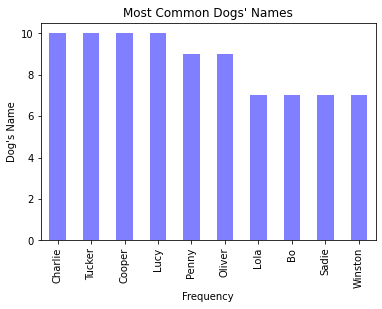

In [157]:
# rank the names frequency in a descending order
ax = twitter_archive_master.name.value_counts().sort_values(ascending =False)[:10].plot(kind = 'bar',color="blue",alpha=.5);
ax.set_title("Most Common Dogs' Names")
ax.set_xlabel('Frequency')
ax.set_ylabel("Dog's Name");

Most common names for dogs are Lucy, Cooper, Charlie

### 2.Most Tweeted day to rate dog's

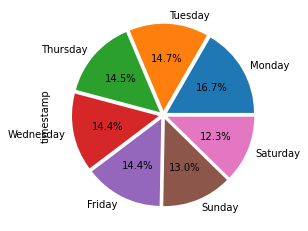

In [158]:
twitter_archive_master.timestamp.dt.day_name().value_counts().plot.pie(explode = (0.05,0.05,0.05,0.05,0.05,0.05,.05),autopct='%1.1f%%');
ax.set_title("Distribution of Tweets by Days");

Most of the tweets are made on monday

### 3. Favorite vs Retweet count over time

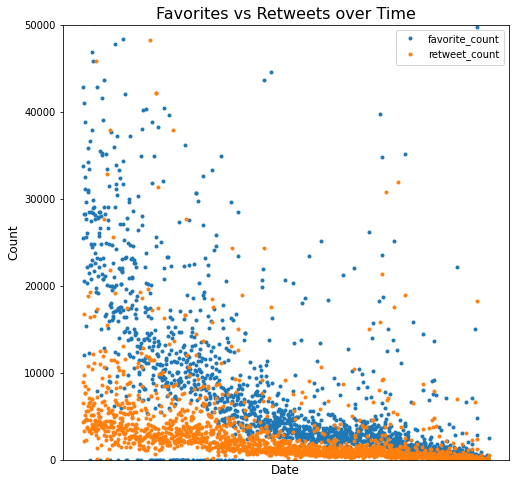

In [159]:
twitter_archive_master[['favorite_count', 'retweet_count']].plot(style =
'.', ylim=[0, 50000], figsize=(8,8))
plt.title('Favorites vs Retweets over Time', size=16)
plt.xlabel('Date', size=12)
plt.xticks([], [])
plt.ylabel('Count', size=12)
plt.legend(ncol=1, loc='upper right');

favorites are more poopular over time and both are decreasing.

### 4.Rating Vs retweet count

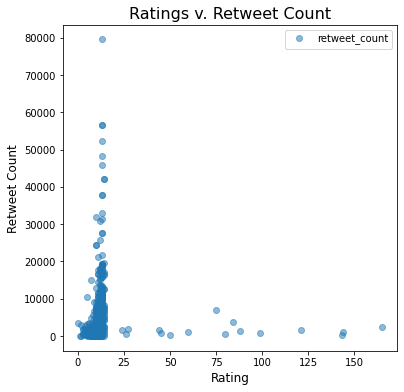

In [160]:
ax = twitter_archive_master.plot(x = 'rating_numerator', y = 'retweet_count', style ='o', alpha=.5, figsize=(6,6));
ax.set_title('Ratings v. Retweet Count', size=16)
ax.set_xlabel('Rating', size=12)
ax.set_ylabel('Retweet Count', size=12);

Most of ratings are below 15 and tweet count is also more for them

In [161]:
twitter_archive_master.favorite_count.describe()

count      1750.000000
mean       8895.441714
std       12471.951176
min           0.000000
25%        1860.250000
50%        4145.500000
75%       11270.750000
max      132810.000000
Name: favorite_count, dtype: float64

In [162]:
twitter_archive_master.retweet_count.describe()

count     1750.000000
mean      3043.297714
std       5205.557005
min         16.000000
25%        665.000000
50%       1505.000000
75%       3494.750000
max      79515.000000
Name: retweet_count, dtype: float64

### 5. Finding strong correlation columns

In [163]:
twitter_archive_master.corr()

,tweet_id,rating_numerator,rating_denominator,img_num,p1_conf,p1_dog,p2_conf,p2_dog,p3_conf,p3_dog,retweet_count,favorite_count
tweet_id,1.000000,0.095011,-0.032594,0.191738,0.104421,0.052710,0.004465,0.053027,-0.049916,0.020064,0.399586,0.603359
rating_numerator,0.095011,1.000000,0.948737,0.035521,0.020080,0.028143,-0.034525,-0.007172,-0.000603,0.017366,0.050694,0.063336
rating_denominator,-0.032594,0.948737,1.000000,-0.001675,-0.003571,0.000428,-0.033962,-0.002148,0.009285,0.006845,-0.023863,-0.029305
img_num,0.191738,0.035521,-0.001675,1.000000,0.212094,-0.008940,-0.173998,0.020470,-0.142066,0.042826,0.085234,0.123798
p1_conf,0.104421,0.020080,-0.003571,0.212094,1.000000,0.095679,-0.539143,0.117825,-0.731536,0.080481,0.043804,0.084850
p1_dog,0.052710,0.028143,0.000428,-0.008940,0.095679,1.000000,0.094326,0.213894,0.009776,0.110578,-0.024839,0.013874
p2_conf,0.004465,-0.034525,-0.033962,-0.173998,-0.539143,0.094326,1.000000,0.076200,0.475377,0.026441,-0.008815,-0.025883
p2_dog,0.053027,-0.007172,-0.002148,0.020470,0.117825,0.213894,0.076200,1.000000,-0.001177,0.074518,-0.009068,0.018540
p3_conf,-0.049916,-0.000603,0.009285,-0.142066,-0.731536,0.009776,0.475377,-0.001177,1.000000,0.001436,-0.033646,-0.058440
p3_dog,0.020064,0.017366,0.006845,0.042826,0.080481,0.110578,0.026441,0.074518,0.001436,1.000000,-0.022480,-0.001863


Favorite and retweet count has strong relationship.

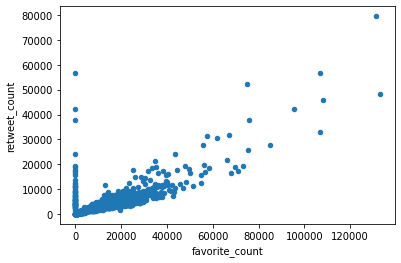

In [164]:
twitter_archive_master.plot(x='favorite_count',y='retweet_count',kind='scatter');

Strong Positive relationship exist between them